In [1]:
#part a
import networkx as nx
G = nx.DiGraph() #create empty directional graph
G.add_node('Start')
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('G')
G.add_edge('Start', 'A', weight=1)
G.add_edge('Start', 'B', weight=4)
G.add_edge('A','C', weight=5)
G.add_edge('B','C', weight=2)
G.add_edge('A','B', weight=2)
G.add_edge('A','G', weight=12)
G.add_edge('C','G', weight=3)
#print(G.adj)
#h(n)=none
print(nx.astar_path(G, 'Start', 'G'))

['Start', 'A', 'B', 'C', 'G']


In [2]:
list=[]

In [3]:
my_file = open("sgb_128.txt", "r")

In [4]:
for lines in my_file:
    stripped_line=(lines.strip())
    line_list=(stripped_line.split())
    list.append((line_list))

In [5]:
my_file.close()

In [6]:
for i in range (len(list)):
    for j in range (2):
        list[i][j]=float(list[i][j])

In [7]:
for i in range (len(list)):
    list[i]=tuple(list[i])

In [8]:
import networkx as nx
import numpy as np
from numpy import linalg as li

In [9]:
r_dist = np.loadtxt("sgb128_dist.txt", dtype=int)
#h(n)=dist for continuous space with weights=1
def dist(x, y):
    v1=np.array(x) #add tuple paramter to a vector for linalg
    v2=np.array(y)
    return li.norm(v1-v2)

In [10]:
r_dist = np.loadtxt("sgb128_dist.txt", dtype=int)
print(r_dist)
r_dist[0][2]

[[   0  966 1513 ... 1564 2871  348]
 [ 966    0 2410 ...  198 1917 2541]
 [1513 2410    0 ... 2217 2673 1570]
 ...
 [1564  198 2217 ...    0  321  936]
 [2871 1917 2673 ...  321    0   34]
 [ 348 2541 1570 ...  936   34    0]]


1513

In [11]:
#graph processing
G = nx.Graph()
G.add_nodes_from(list)
i=0
j=0
for i in range (len(list)):
    for j in range (i+1,len(list)):
        if ((dist(list[i],list[j]))<230):
        #print(dist(list[i],list[j]))
            G.add_edge(list[i], list[j], weight=r_dist[i][j]) #add road distance as weight if straight line < 230
G.number_of_edges()

377

In [12]:
#for weight adjusting purpose
def dist2(x,y): #weight=2 for heuristic
    v1=np.array(x)
    v2=np.array(y)
    return 2*(li.norm(v1-v2))
def dist4(x,y): #weight=4 for heuristic
    v1=np.array(x)
    v2=np.array(y)
    return 4*(li.norm(v1-v2))
def dist16(x,y): #weight=16
    v1=np.array(x)
    v2=np.array(y)
    return 16*(li.norm(v1-v2))
def dist32(x,y): #weight=32
    v1=np.array(x)
    v2=np.array(y)
    return 32*(li.norm(v1-v2))
def dist64(x,y): #weight=64
    v1=np.array(x)
    v2=np.array(y)
    return 64*(li.norm(v1-v2))
#start: (-6712.64, 3446.49) target: (-5531.11,1846.22)
res_1=nx.astar_path(G,(-6712.64, 3446.49),(-5531.11,1846.22),heuristic=dist)
res_2=nx.astar_path(G,(-6712.64, 3446.49),(-5531.11,1846.22),heuristic=dist2)
res_4=nx.astar_path(G,(-6712.64, 3446.49),(-5531.11,1846.22),heuristic=dist4)
res_16=nx.astar_path(G,(-6712.64, 3446.49),(-5531.11,1846.22),heuristic=dist16)
res_32=nx.astar_path(G,(-6712.64, 3446.49),(-5531.11,1846.22),heuristic=dist32)
res_64=nx.astar_path(G,(-6712.64, 3446.49),(-5531.11,1846.22),heuristic=dist64)
print(res_4)
print(res_64)
print(dist((-6712.64, 3446.49), (-6772.07, 3241.95)))
print(dist32((-6712.64, 3446.49), (-6772.07, 3241.95)))

[(-6712.64, 3446.49), (-6772.07, 3241.95), (-6709.88, 3102.4), (-6660.11, 2935.87), (-6553.01, 2747.93), (-6441.79, 2674.67), (-6231.74, 2668.46), (-6039.65, 2727.21), (-5975.39, 2908.91), (-5772.25, 2877.83), (-5570.49, 2788.7), (-5523.51, 2575.2), (-5351.44, 2593.85), (-5375.64, 2483.28), (-5551.82, 2343.71), (-5689.32, 2252.5), (-5690.01, 2157.15), (-5696.92, 1931.22), (-5531.11, 1846.22)]
[(-6712.64, 3446.49), (-6772.07, 3241.95), (-6709.88, 3102.4), (-6660.11, 2935.87), (-6553.01, 2747.93), (-6441.79, 2674.67), (-6231.74, 2668.46), (-6047.92, 2672.62), (-5865.51, 2752.08), (-5790.89, 2758.28), (-5685.17, 2603.52), (-5544.93, 2494.33), (-5551.82, 2343.71), (-5602.95, 2216.59), (-5618.84, 2065.25), (-5702.45, 1889.08), (-5531.11, 1846.22)]
212.99891196905187
6815.96518300966


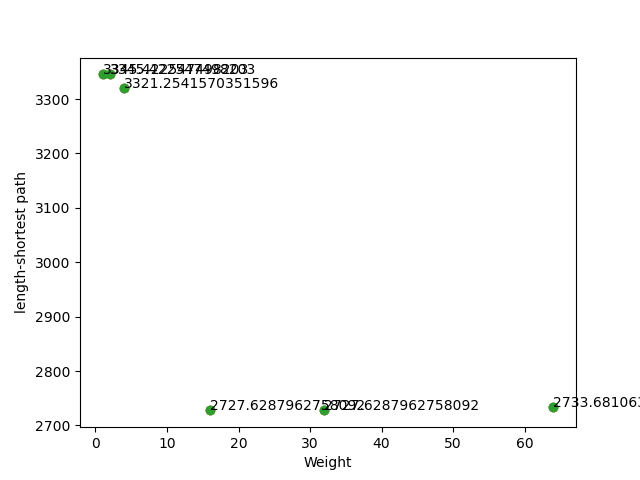

3345.422547498203
3345.422547498203
3321.2541570351596
2727.6287962758092
2727.6287962758092
2733.6810630995165


In [67]:
import matplotlib.pyplot as plt
mylen=0
x=[1,2,4,16,32,64]
y=[]
for i in range (len(res_1)-1):
    mylen+=dist(res_1[i],res_1[i+1])
y.append(mylen)
mylen=0

for i in range (len(res_2)-1):
    mylen+=dist(res_2[i],res_2[i+1])
y.append(mylen)
mylen=0

for i in range (len(res_4)-1):
    mylen+=dist(res_4[i],res_4[i+1])
y.append(mylen)
mylen=0

for i in range (len(res_16)-1):
    mylen+=dist(res_16[i],res_16[i+1])
    #i=i+1
y.append(mylen)
mylen=0

for i in range (len(res_32)-1):
    mylen+=dist(res_32[i],res_32[i+1])
y.append(mylen)
mylen=0

for i in range (len(res_64)-1):
    mylen+=dist(res_64[i],res_64[i+1])
y.append(mylen)
mylen=0

plt.xlabel('Weight')
plt.ylabel('length-shortest path')
plt.scatter(x,y)
for i, label in enumerate(y):
    plt.annotate(label, (x[i], y[i]))
plt.show()
for i in range (len(y)):
    print(y[i])

In [31]:
distance, path=nx.single_source_dijkstra(G,(-6712.64, 3446.49),(-5531.11,1846.22))
print(path)
print(len(path))

[(-6712.64, 3446.49), (-6772.07, 3241.95), (-6709.88, 3102.4), (-6660.11, 2935.87), (-6553.01, 2747.93), (-6441.79, 2674.67), (-6231.74, 2668.46), (-6039.65, 2727.21), (-5975.39, 2908.91), (-5772.25, 2877.83), (-5570.49, 2788.7), (-5523.51, 2575.2), (-5351.44, 2593.85), (-5375.64, 2483.28), (-5551.82, 2343.71), (-5689.32, 2252.5), (-5754.27, 2130.2), (-5696.92, 1931.22), (-5531.11, 1846.22)]
19


# Path Visualization

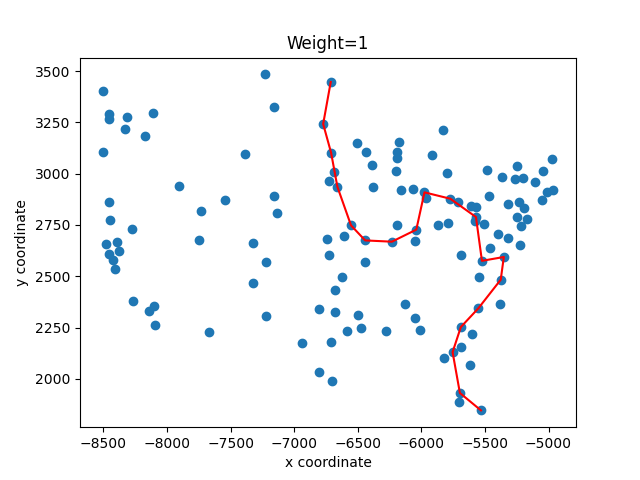

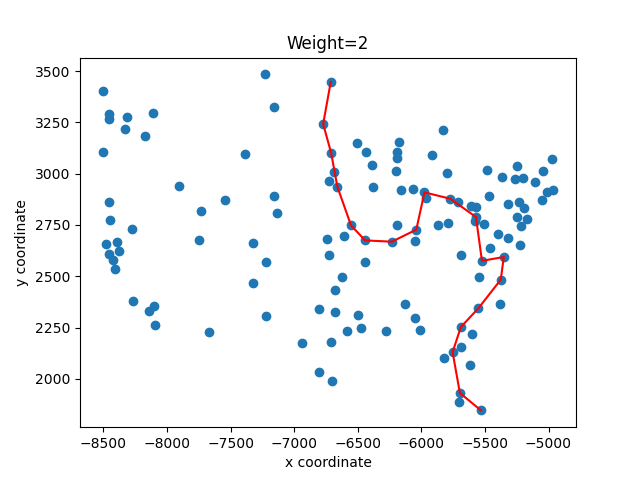

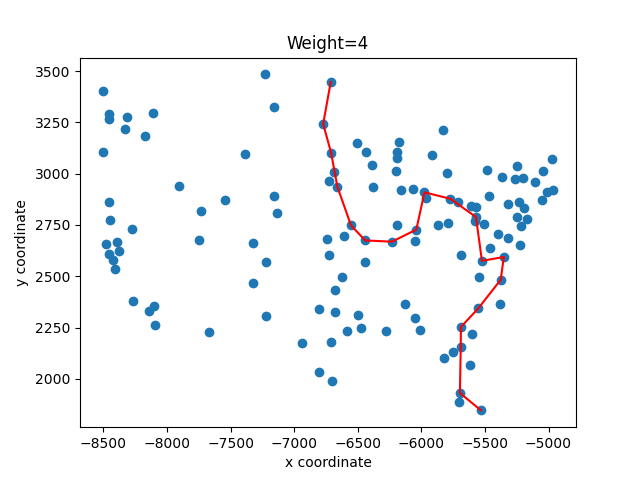

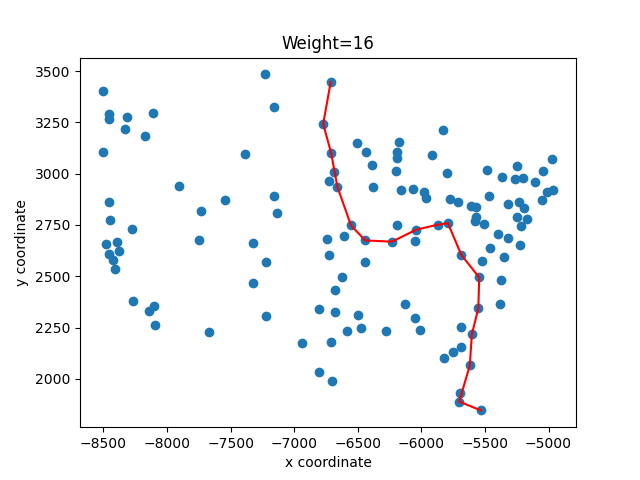

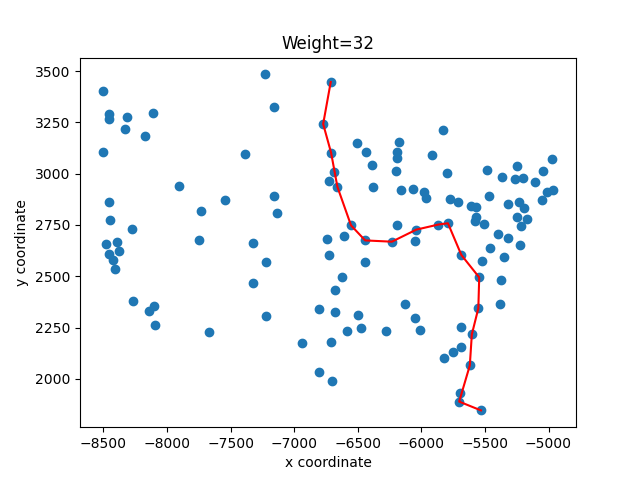

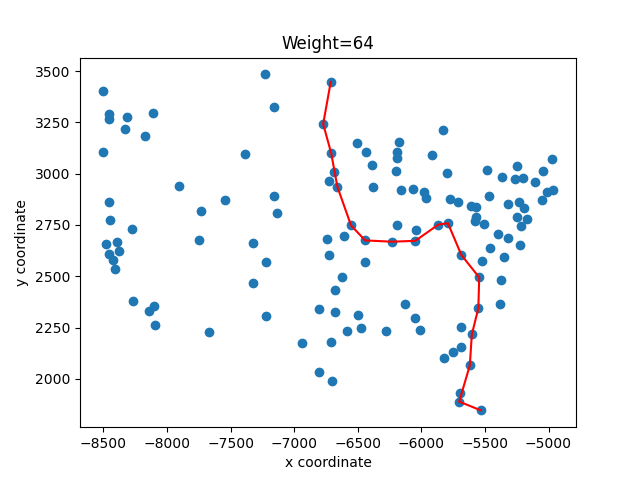

In [63]:
x_scatter=[]
y_scatter=[]
for i in range (len(list)):
    x_scatter.append(list[i][0])#add matrix elements to a new vector
    y_scatter.append(list[i][1])
i=0
x_path=[]
y_path=[]
for i in range (len(res_1)):
    x_path.append(res_1[i][0])
    y_path.append(res_1[i][1])
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")               
plt.title("Weight=1")
plt.subplot(1, 1, 1)
plt.scatter(x_scatter, y_scatter)
plt.plot(x_path,y_path, color='red')
plt.show()

x_path=[]
y_path=[]
for i in range (len(res_2)):
    x_path.append(res_2[i][0])
    y_path.append(res_2[i][1])
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")               
plt.title("Weight=2")
plt.subplot(1, 1, 1)
plt.scatter(x_scatter, y_scatter)
plt.plot(x_path,y_path, color='red')
plt.show()

x_path=[]
y_path=[]
for i in range (len(res_4)):
    x_path.append(res_4[i][0])
    y_path.append(res_4[i][1])
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")               
plt.title("Weight=4")
plt.subplot(1, 1, 1)
plt.scatter(x_scatter, y_scatter)
plt.plot(x_path,y_path, color='red')
plt.show()

x_path=[]
y_path=[]
for i in range (len(res_16)):
    x_path.append(res_16[i][0])
    y_path.append(res_16[i][1])
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")               
plt.title("Weight=16")
plt.subplot(1, 1, 1)
plt.scatter(x_scatter, y_scatter)
plt.plot(x_path,y_path, color='red')
plt.show()

x_path=[]
y_path=[]
for i in range (len(res_32)):
    x_path.append(res_32[i][0])
    y_path.append(res_32[i][1])
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")               
plt.title("Weight=32")
plt.subplot(1, 1, 1)
plt.scatter(x_scatter, y_scatter)
plt.plot(x_path,y_path, color='red')
plt.show()

x_path=[]
y_path=[]
for i in range (len(res_64)):
    x_path.append(res_64[i][0])
    y_path.append(res_64[i][1])
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")               
plt.title("Weight=64")
plt.subplot(1, 1, 1)
plt.scatter(x_scatter, y_scatter)
plt.plot(x_path,y_path, color='red')
plt.show()